In [1]:
# from Feat_eng import Y_train, X_train, Y_test, X_test, c1_train, c2_train, c3_train, c1_test, c2_test, c3_test, Y_c1train, Y_c2train, Y_c3train, Y_c1test, Y_c2test ,Y_c3test

In [2]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats 
from scipy.stats import norm, skew, probplot
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
from Pred_ZRI_feats import zip_test, zip_train, future_feats, future_targets, Y_train, X_train, Y_test, X_test, c1_train, c2_train, c3_train, c1_test, c2_test, c3_test, Y_c1train, Y_c2train, Y_c3train, Y_c1test, Y_c2test ,Y_c3test, target

/Users/jonahwork/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jonahwork/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jonahwork/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [4]:
target

,RegionName,year,value,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,...,log_value,future_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,employed_ratio,civil_labor_ratio,Cluster
0,01104,2014,946.100000,01104,3346.0,5526.0,1949.0,158.0,1597.0,523.0,...,6.852348,972.583333,0.477361,0.329594,0.117433,0.010904,0.531703,0.395109,0.469239,1
1,01104,2015,972.583333,01104,3377.0,5407.0,1948.0,146.0,1791.0,466.0,...,6.879956,1058.666667,0.478263,0.319353,0.101512,0.019630,0.549670,0.398254,0.461912,1
2,01104,2016,1058.666667,01104,3432.0,5434.0,1949.0,172.0,1898.0,516.0,...,6.964766,1129.166667,0.467110,0.315878,0.079972,0.017987,0.571669,0.392658,0.449424,1
3,01104,2017,1129.166667,01104,3287.0,5702.0,1946.0,107.0,2032.0,577.0,...,7.029235,1125.083333,0.460292,0.292194,0.078781,0.012735,0.596573,0.388238,0.438968,1
4,01104,2018,1125.083333,01104,3478.0,5599.0,1946.0,75.0,1963.0,502.0,...,7.025612,1145.583333,0.463101,0.275423,0.086447,0.013905,0.604750,0.391816,0.436003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,98499,2014,979.000000,98499,5610.0,6870.0,1973.0,265.0,2355.0,952.0,...,6.886532,995.833333,0.492245,0.467639,0.103251,0.086748,0.211496,0.397328,0.469392,1
6043,98499,2015,995.833333,98499,5736.0,6891.0,1973.0,346.0,2355.0,816.0,...,6.903580,1036.166667,0.505450,0.463689,0.108836,0.087294,0.221283,0.396388,0.464463,1
6044,98499,2016,1036.166667,98499,5670.0,6965.0,1973.0,310.0,2352.0,995.0,...,6.943283,1154.833333,0.502808,0.439341,0.120046,0.093177,0.210382,0.403395,0.459354,1
6045,98499,2017,1154.833333,98499,5149.0,7244.0,1973.0,327.0,2367.0,1006.0,...,7.051711,1257.416667,0.510771,0.425098,0.124402,0.108897,0.206512,0.412859,0.463662,1


In [5]:
future_feats.shape

(2574, 137)

In [6]:
future_targets.shape

(2574, 3)

In [7]:
future_feats

,year,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,...,est,log_value,male_ratio,white_ratio,black_ratio,asian_ratio,hispanic_ratio,employed_ratio,civil_labor_ratio,Cluster
0,2019,3514.005750,5619.596240,1945.251283,64.221758,2069.917185,500.311260,181.584777,552.064005,465.324405,...,504.060577,7.069693,0.459636,0.263420,0.080712,0.015700,0.624568,0.391020,0.428081,1
1,2020,3550.011500,5640.192481,1944.502565,53.443516,2176.834370,498.622521,161.169554,608.128010,440.648811,...,500.121154,7.113774,0.456172,0.251416,0.074977,0.017495,0.644386,0.390223,0.420160,1
2,2021,3586.017251,5660.788721,1943.753848,42.665274,2283.751555,496.933781,140.754331,664.192015,415.973216,...,496.181731,7.157854,0.452707,0.239413,0.069242,0.019291,0.664204,0.389427,0.412239,1
3,2019,3370.873725,6619.614626,0.000000,311.662957,2014.843245,729.487100,354.197443,677.049498,760.454862,...,248.656208,7.084782,0.478647,0.295612,0.161785,0.047261,0.467141,0.421469,0.459697,1
4,2020,3409.747451,6693.229251,0.000000,344.325913,2032.686491,782.974201,379.394886,696.098996,808.909725,...,246.312417,7.092137,0.479053,0.284688,0.162744,0.046371,0.481499,0.424769,0.457455,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,2020,3839.149961,7492.102714,1972.000254,207.124040,647.776627,379.302655,415.846214,846.355676,769.799947,...,330.828118,7.349357,0.490387,0.574766,0.123798,0.083781,0.115791,0.453177,0.460586,1
2570,2021,3756.724942,7609.154072,1972.000381,210.686060,575.664940,377.453983,433.269321,922.533514,858.199920,...,341.242176,7.422146,0.491915,0.569195,0.130759,0.084051,0.116907,0.463085,0.463251,1
2571,2019,5366.584888,7717.252494,1971.750127,533.233881,2199.355425,973.789775,615.147082,906.323242,874.294928,...,1268.491165,7.200888,0.517350,0.426119,0.136041,0.093197,0.214187,0.423036,0.452032,1
2572,2020,5325.169777,7895.504988,1971.500253,608.467762,2169.710849,984.579549,635.294164,988.646483,905.589855,...,1274.982330,7.264961,0.522501,0.418256,0.143377,0.095051,0.214856,0.428323,0.448631,1


In [8]:
with open("Pickle_lasso_all.pkl" , 'rb') as file:  
     lasso_all = pickle.load(file)

In [9]:
with open("Pickle_lasso_all_PCA.pkl" , 'rb') as file:  
     lasso_all_PCA = pickle.load(file)

In [10]:
with open("Pickle_lasso_c1.pkl" , 'rb') as file:  
     lasso_c1 = pickle.load(file)

In [11]:
with open("Pickle_lasso_c1_PCA.pkl" , 'rb') as file:  
     lasso_c1_PCA = pickle.load(file)

In [12]:
with open("Pickle_lasso_c2.pkl" , 'rb') as file:  
     lasso_c2 = pickle.load(file)

In [13]:
with open("Pickle_lasso_c2_PCA.pkl" , 'rb') as file:  
     lasso_c2_PCA = pickle.load(file)

In [14]:
with open("Pickle_lasso_c3.pkl" , 'rb') as file:  
     lasso_c2 = pickle.load(file)

In [15]:
with open("Pickle_lasso_c3_PCA.pkl" , 'rb') as file:  
     lasso_c2_PCA = pickle.load(file)

In [16]:
with open("rf_all.pkl" , 'rb') as file:  
     rf_all = pickle.load(file)

In [17]:
list(future_feats.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [18]:
list(zip(future_feats.columns, list(future_feats.max())))

[('year', 2021.0),
 ('nonfamily_households', 24961.959410419437),
 ('family_households', 39191.43550797895),
 ('median_year_structure_built', 2017.7311023079146),
 ('rent_burden_not_computed', 2848.4269941944117),
 ('rent_over_50_percent', 12073.40810342431),
 ('rent_40_to_50_percent', 3186.730045744383),
 ('rent_35_to_40_percent', 2460.3496850851934),
 ('rent_30_to_35_percent', 3759.892474697628),
 ('rent_25_to_30_percent', 3899.5252270303718),
 ('rent_20_to_25_percent', 4483.325450814269),
 ('rent_15_to_20_percent', 4376.319911928115),
 ('rent_10_to_15_percent', 3883.8962934748374),
 ('rent_under_10_percent', 4032.3474486861496),
 ('total_pop', 148814.68682023592),
 ('median_age', 62.158737450659274),
 ('commuters_by_public_transportation', 36490.498611471776),
 ('households', 46486.47985255736),
 ('median_income', 179693.74810481275),
 ('income_per_capita', 157709.9979141879),
 ('housing_units', 50209.35217695162),
 ('vacant_housing_units', 12429.59346359319),
 ('vacant_housing_unit

In [19]:
future_feats_2020 = future_feats[future_feats['year']==2020]

In [20]:
future_targets_2021 = future_targets[future_targets['year']==2021]

In [21]:
print(rf_all.best_params_)
print(rf_all.best_score_)
Y_pred = rf_all.predict(future_feats_2020)
pred_unlog = np.exp(Y_pred)
Y_unlog = future_targets_2021[['ZRI']]
train_RMSE = np.sqrt(mean_squared_error(Y_unlog, pred_unlog))
print('The RMSE is:', train_RMSE)

{'n_estimators': 19, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_samples': 0.7}
0.9787581366670949
The RMSE is: 155.6823800441864


In [22]:
Y_pred_test = np.exp(rf_all.predict(X_test))

In [23]:
Y_actual = np.exp(Y_test)

In [24]:
zip_test

,RegionName,City
0,01104,Springfield
1,01108,Springfield
2,01109,Springfield
3,01602,Worcester
4,01603,Worcester
...,...,...
920,98125,Seattle
921,98201,Everett
922,98203,Everett
923,98498,Lakewood


In [25]:
diff_df = pd.DataFrame()

In [26]:
diff_df['Zip'] = zip_test['RegionName']
diff_df['City'] = zip_test['City']
diff_df['Pred'] = Y_pred_test
diff_df['Act'] = np.exp(Y_test)

In [27]:
diff_df['Model_Error'] = diff_df['Pred'] - diff_df['Act']

In [28]:
diff_df

,Zip,City,Pred,Act,Model_Error
0,01104,Springfield,1150.714148,1145.583333,5.130815
1,01108,Springfield,1192.499645,1201.500000,-9.000355
2,01109,Springfield,1171.390547,1196.727273,-25.336726
3,01602,Worcester,1462.432603,1401.333333,61.099270
4,01603,Worcester,1324.319494,1325.583333,-1.263839
...,...,...,...,...,...
920,98125,Seattle,1761.159632,1645.200000,115.959632
921,98201,Everett,1454.265146,1450.916667,3.348480
922,98203,Everett,1519.896025,1510.916667,8.979359
923,98498,Lakewood,1373.151584,1409.000000,-35.848416


In [29]:
comparison = pd.DataFrame()

In [30]:
comparison['Zip'] = future_targets_2021['RegionName']

In [31]:
comparison['Year'] = future_targets_2021['year']

In [32]:
comparison['NoCOVID_ZRI'] = pred_unlog

In [33]:
comparison['COVID_ZRI'] = future_targets_2021[['ZRI']]

In [34]:
comparison['Difference'] = comparison['NoCOVID_ZRI'] - comparison['COVID_ZRI']

In [35]:
comparison = comparison[comparison['Year']==2021]

In [36]:
test = comparison.merge(diff_df, how = 'left', on = 'Zip')

In [37]:
test['Pct'] = (test['Difference'] - test['Model_Error'])/test['Model_Error']

In [38]:
test['Diff_Greater_Than_Error'] = (abs(test['Difference'])>abs(test['Model_Error']))

In [39]:
test['Adjusted_Diff'] = test['Difference'] - test['Model_Error']

In [40]:
test['Pct_Diff'] = test['Adjusted_Diff']/test['NoCOVID_ZRI']

In [41]:
test_true = test[test['Diff_Greater_Than_Error'] == True]

In [42]:
test_true['Zip_Round'] = (df['Zip'] / 100).astype(int) *100

NameError: name 'df' is not defined

In [43]:
test_true.sort_values(by = 'Pct_Diff').head(20)

,Zip,Year,NoCOVID_ZRI,COVID_ZRI,Difference,City,Pred,Act,Model_Error,Pct,Diff_Greater_Than_Error,Adjusted_Diff,Pct_Diff
832,97232,2021,1601.529341,1691.735657,-90.206316,Portland,1696.388918,1644.416667,51.972251,-2.735663,True,-142.178568,-0.088777
359,32209,2021,797.198911,834.765626,-37.566715,Jacksonville,844.080543,811.416667,32.663877,-2.150100,True,-70.230591,-0.088097
314,27603,2021,1224.936865,1317.861477,-92.924612,Raleigh,1265.614813,1281.000000,-15.385187,5.039875,True,-77.539425,-0.063301
581,77006,2021,1391.992825,1446.887077,-54.894252,Houston,1425.627350,1406.416667,19.210683,-3.857486,True,-74.104935,-0.053237
448,47374,2021,666.685362,690.879935,-24.194572,Richmond,681.265020,671.555556,9.709465,-3.491854,True,-33.904037,-0.050855
276,20009,2021,2206.814309,2450.543355,-243.729045,Washington,2241.659876,2382.000000,-140.340124,0.736703,True,-103.388922,-0.046850
72,10013,2021,4096.851514,4582.633915,-485.782401,New York,4158.944133,4454.454545,-295.510413,0.643876,True,-190.271988,-0.046443
628,78731,2021,1457.496885,1610.875458,-153.378573,Austin,1471.537226,1565.818182,-94.280955,0.626825,True,-59.097617,-0.040547
247,15217,2021,1245.111908,1277.139111,-32.027204,Pittsburgh,1258.270995,1241.416667,16.854329,-2.900236,True,-48.881532,-0.039259
278,20011,2021,1923.188363,2014.248998,-91.060635,Washington,1937.855418,1957.909091,-20.053673,3.540846,True,-71.006962,-0.036921


In [44]:
test_true.sort_values(by = 'Pct_Diff', ascending = False).head(20)

,Zip,Year,NoCOVID_ZRI,COVID_ZRI,Difference,City,Pred,Act,Model_Error,Pct,Diff_Greater_Than_Error,Adjusted_Diff,Pct_Diff
543,75034,2021,2219.062987,1685.237225,533.825762,Frisco,1535.308416,1638.100000,-102.791584,-6.193283,True,636.617346,0.286886
803,94602,2021,3401.134242,2738.257583,662.876659,Oakland,2631.470659,2661.666667,-30.196008,-22.952460,True,693.072667,0.203777
824,95816,2021,1884.005793,1624.779515,259.226277,Sacramento,1455.905324,1579.333333,-123.428009,-3.100222,True,382.654287,0.203107
825,95831,2021,1941.569517,1618.263937,323.305580,Sacramento,1562.530555,1573.000000,-10.469445,-31.880871,True,333.775025,0.171910
808,94608,2021,3474.075462,2942.983917,531.091545,Oakland,2798.474457,2860.666667,-62.192210,-9.539519,True,593.283755,0.170775
805,94605,2021,2976.312706,2539.532440,436.780266,Oakland,2407.046460,2468.500000,-61.453540,-8.107487,True,498.233806,0.167400
472,55406,2021,1837.010712,1485.271316,351.739396,Minneapolis,1509.300211,1443.727273,65.572939,4.364094,True,286.166458,0.155778
852,98121,2021,2810.177054,2379.931942,430.245112,Seattle,2307.625440,2313.363636,-5.738197,-75.979149,True,435.983309,0.155144
366,32811,2021,1620.354649,1373.329625,247.025024,Orlando,1332.872035,1334.916667,-2.044632,-121.816380,True,249.069656,0.153713
830,97214,2021,1928.611360,1641.084049,287.527311,Portland,1588.715838,1595.181818,-6.465980,-45.467705,True,293.993292,0.152438


In [45]:
test_true.sort_values(by = 'Pct_Diff', key = abs, ascending = False).head(20)

,Zip,Year,NoCOVID_ZRI,COVID_ZRI,Difference,City,Pred,Act,Model_Error,Pct,Diff_Greater_Than_Error,Adjusted_Diff,Pct_Diff
543,75034,2021,2219.062987,1685.237225,533.825762,Frisco,1535.308416,1638.100000,-102.791584,-6.193283,True,636.617346,0.286886
803,94602,2021,3401.134242,2738.257583,662.876659,Oakland,2631.470659,2661.666667,-30.196008,-22.952460,True,693.072667,0.203777
824,95816,2021,1884.005793,1624.779515,259.226277,Sacramento,1455.905324,1579.333333,-123.428009,-3.100222,True,382.654287,0.203107
825,95831,2021,1941.569517,1618.263937,323.305580,Sacramento,1562.530555,1573.000000,-10.469445,-31.880871,True,333.775025,0.171910
808,94608,2021,3474.075462,2942.983917,531.091545,Oakland,2798.474457,2860.666667,-62.192210,-9.539519,True,593.283755,0.170775
805,94605,2021,2976.312706,2539.532440,436.780266,Oakland,2407.046460,2468.500000,-61.453540,-8.107487,True,498.233806,0.167400
472,55406,2021,1837.010712,1485.271316,351.739396,Minneapolis,1509.300211,1443.727273,65.572939,4.364094,True,286.166458,0.155778
852,98121,2021,2810.177054,2379.931942,430.245112,Seattle,2307.625440,2313.363636,-5.738197,-75.979149,True,435.983309,0.155144
366,32811,2021,1620.354649,1373.329625,247.025024,Orlando,1332.872035,1334.916667,-2.044632,-121.816380,True,249.069656,0.153713
830,97214,2021,1928.611360,1641.084049,287.527311,Portland,1588.715838,1595.181818,-6.465980,-45.467705,True,293.993292,0.152438


In [46]:
test_true.sort_values(by = 'Pct_Diff', key = abs).head(20)

,Zip,Year,NoCOVID_ZRI,COVID_ZRI,Difference,City,Pred,Act,Model_Error,Pct,Diff_Greater_Than_Error,Adjusted_Diff,Pct_Diff
627,78729,2021,1306.770677,1291.970625,14.800052,Austin,1270.404639,1255.833333,14.571305,0.015698,True,0.228747,0.000175
525,63104,2021,865.087728,879.345899,-14.258172,Saint Louis,841.052571,854.750000,-13.697429,0.040938,True,-0.560743,-0.000648
53,06513,2021,1304.206095,1275.853142,28.352953,New Haven,1267.163163,1240.166667,26.996496,0.050246,True,1.356457,0.001040
162,11232,2021,2224.998180,2125.278819,99.719361,New York,2163.034525,2065.833333,97.201192,0.025907,True,2.518169,0.001132
450,53204,2021,759.364073,729.659057,29.705016,Milwaukee,738.024586,709.250000,28.774586,0.032335,True,0.930430,0.001225
57,06605,2021,1493.719111,1448.258777,45.460333,Bridgeport,1450.618472,1407.750000,42.868472,0.060461,True,2.591862,0.001735
90,10075,2021,3149.651620,3154.319355,-4.667735,New York,3066.957856,3066.090909,0.866947,-6.384107,True,-5.534682,-0.001757
678,85716,2021,809.852235,776.639807,33.212427,Tucson,785.570112,754.916667,30.653446,0.083481,True,2.558982,0.003160
521,60654,2021,2238.110195,2225.670166,12.440029,Chicago,2168.524640,2163.416667,5.107974,1.435414,True,7.332055,0.003276
495,60618,2021,1760.823892,1690.745850,70.078042,Chicago,1707.603985,1643.454545,64.149439,0.092419,True,5.928603,0.003367


In [47]:
test_true.groupby('City')[['Pct_Diff']].mean().sort_values(by = 'Pct_Diff', ascending = False)

,Pct_Diff
City,
Frisco,0.286886
Sacramento,0.187508
Oakland,0.141766
Duluth,0.127380
Minneapolis,0.117184
...,...
Alexandria,-0.013929
Silver Spring,-0.015072
Pompano Beach,-0.016050


In [124]:
test_true[test_true['City']=='Frisco']

,Zip,Year,NoCOVID_ZRI,COVID_ZRI,Difference,City,Pred,Act,Model_Error,Pct,Diff_Greater_Than_Error,Adjusted_Diff,Pct_Diff
543,75034,2021,2219.062987,1685.237225,533.825762,Frisco,1535.308416,1638.1,-102.791584,-6.193283,True,636.617346,0.286886


In [125]:
test_true['Pct_Diff'].mean()

0.05454247871860959

In [126]:
test_true['Model_Error'].mean()

18.668849257369168

In [56]:
import seaborn as sns

[Text(0, 0.5, 'Cities'), Text(0.5, 0, 'Percent Change')]

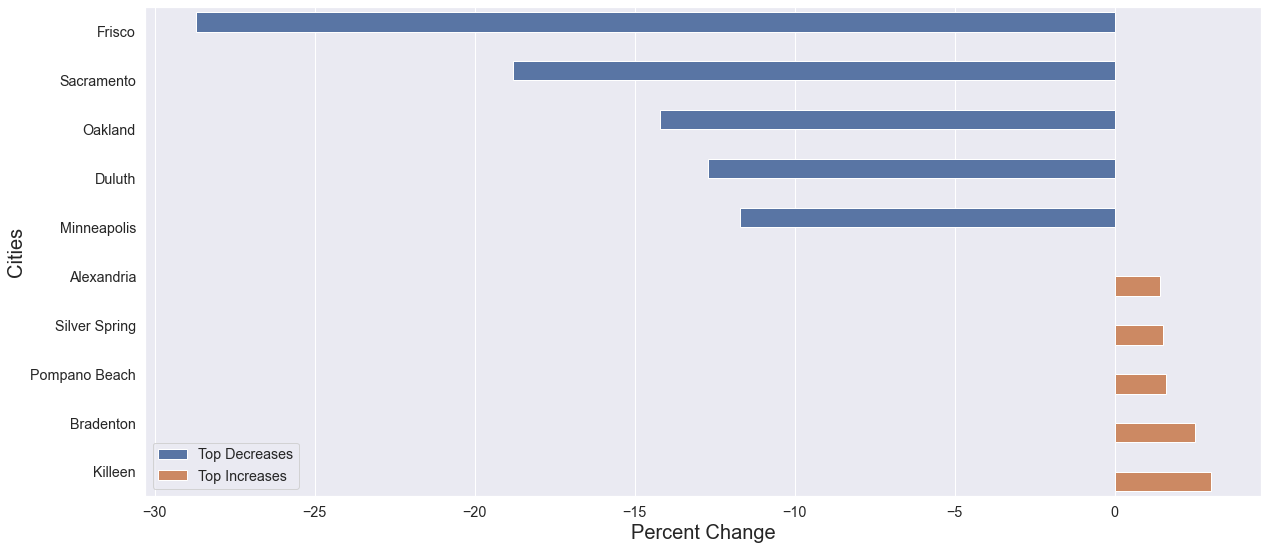

In [79]:
cit = ['Frisco', 'Sacramento', 'Oakland', 'Duluth', 'Minneapolis', 'Alexandria', 'Silver Spring', 'Pompano Beach', 'Bradenton', 'Killeen']
pct = [-28.7,-18.8,-14.2,-12.7,-11.7,1.4,1.5,1.6,2.5, 3.0]
colors = ["Top Increases" if c > 0 else "Top Decreases" for c in pct]
sns.set(font_scale = 1.3)
plt.figure(figsize=(20,9))
plt.rcParams["axes.labelsize"] = 20
g = sns.barplot(
    x=pct,
    y=cit,
    hue=colors, # Here I am!
    palette=sns.color_palette() # Default palette is far better for it
)
g.set(ylabel='Cities', xlabel='Percent Change')

In [85]:
top_error = test_true.sort_values(by = 'Model_Error').head()

In [83]:
bottom_error = test_true.sort_values(by = 'Model_Error').tail()

In [90]:
errors = pd.concat([top_error, bottom_error])
errors['Zip_City'] = errors['City'] +'_'+ errors['Zip']
errors

,Zip,Year,NoCOVID_ZRI,COVID_ZRI,Difference,City,Pred,Act,Model_Error,Pct,Diff_Greater_Than_Error,Adjusted_Diff,Pct_Diff,Zip_City
72,10013,2021,4096.851514,4582.633915,-485.782401,New York,4158.944133,4454.454545,-295.510413,0.643876,True,-190.271988,-0.046443,New York_10013
810,94610,2021,3016.776537,2755.403842,261.372695,Oakland,2527.298632,2678.333333,-151.034701,-2.730547,True,412.407396,0.136705,Oakland_94610
276,20009,2021,2206.814309,2450.543355,-243.729045,Washington,2241.659876,2382.000000,-140.340124,0.736703,True,-103.388922,-0.046850,Washington_20009
801,94115,2021,3594.317091,3745.085919,-150.768828,San Francisco,3509.726632,3640.333333,-130.606701,0.154373,True,-20.162127,-0.005609,San Francisco_94115
824,95816,2021,1884.005793,1624.779515,259.226277,Sacramento,1455.905324,1579.333333,-123.428009,-3.100222,True,382.654287,0.203107,Sacramento_95816
719,90037,2021,2549.038478,2145.111326,403.927153,Los Angeles,2392.681730,2085.111111,307.570619,0.313283,True,96.356533,0.037801,Los Angeles_90037
738,90221,2021,2493.644422,2099.730893,393.913529,Compton,2354.513728,2041.000000,313.513728,0.256447,True,80.399801,0.032242,Compton_90221
706,90023,2021,2601.765967,2099.543843,502.222124,Los Angeles,2375.679959,2040.818182,334.861778,0.499789,True,167.360347,0.064326,Los Angeles_90023
705,90022,2021,2529.371993,2070.307912,459.064081,East Los Angeles,2450.134341,2012.400000,437.734341,0.048728,True,21.329740,0.008433,East Los Angeles_90022
736,90201,2021,2771.306248,2080.698545,690.607703,Bell,2605.000919,2022.500000,582.500919,0.185591,True,108.106784,0.039009,Bell_90201


[Text(0, 0.5, 'Cities_Zip'), Text(0.5, 0, 'Error (Predicted - Actual)')]

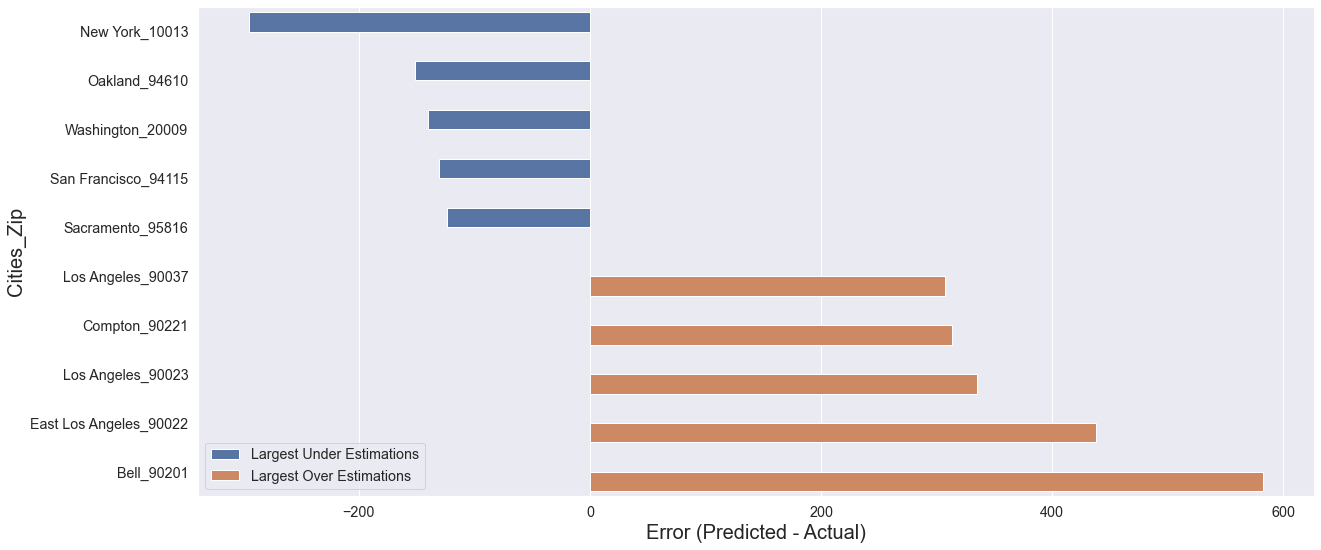

In [93]:
colors = ["Largest Over Estimations" if c > 0 else "Largest Under Estimations" for c in pct]
sns.set(font_scale = 1.3)
plt.figure(figsize=(20,9))
plt.rcParams["axes.labelsize"] = 20
g = sns.barplot(
    x=errors['Model_Error'],
    y=errors['Zip_City'],
    hue=colors, # Here I am!
    palette=sns.color_palette() # Default palette is far better for it
)
g.set(ylabel='Cities_Zip', xlabel='Error (Predicted - Actual)')

In [48]:
with open("rf_all_PCA.pkl" , 'rb') as file:  
     rf_all_PCA = pickle.load(file)

In [49]:
with open("rf_cluster1.pkl" , 'rb') as file:  
     rf_c1 = pickle.load(file)

In [50]:
with open("rf_cluster2.pkl" , 'rb') as file:  
     rf_c1 = pickle.load(file)

In [51]:
with open("rf_cluster3.pkl" , 'rb') as file:  
     rf_c1 = pickle.load(file)

In [106]:
clustx=X_train[['total_pop', 'median_income', 'Cluster']]

In [105]:
X_train['Cluster'].value_counts()

1    2582
0    1363
2    1177
Name: Cluster, dtype: int64

In [107]:
clusty=np.exp(Y_train)

In [109]:
cluster_info = pd.concat([clustx,clusty],axis = 1)
cluster_info

,total_pop,median_income,Cluster,future_value
0,22285.0,29184.0,1,972.583333
1,23485.0,28858.0,1,1058.666667
2,23183.0,28590.0,1,1129.166667
3,23635.0,30053.0,1,1125.083333
4,24808.0,37084.0,1,1025.909091
...,...,...,...,...
5117,28709.0,60723.0,1,1344.500000
5118,30237.0,39046.0,1,995.833333
5119,31010.0,39151.0,1,1036.166667
5120,30630.0,37982.0,1,1154.833333


[Text(0, 0.5, 'Total Population'), Text(0.5, 0, 'Cluster')]

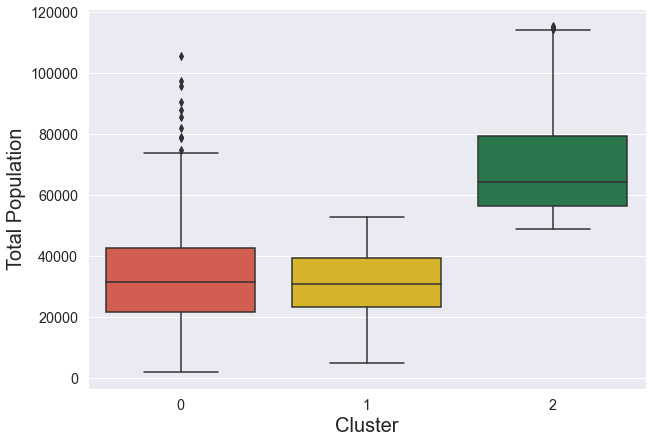

In [118]:
sns.set(font_scale = 1.3)
plt.figure(figsize=(10,7))
plt.rcParams["axes.labelsize"] = 20
ax = sns.boxplot(x = 'Cluster', y = "total_pop",\
                 palette = ['#E74C3C', '#F1C40F', '#1E8449'], data = cluster_info)
ax.set(ylabel='Total Population', xlabel='Cluster')

[Text(0, 0.5, 'Median Income'), Text(0.5, 0, 'Cluster')]

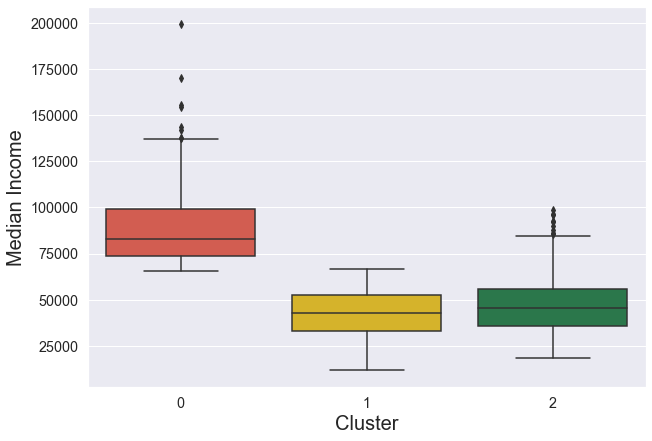

In [122]:
sns.set(font_scale = 1.3)
plt.figure(figsize=(10,7))
plt.rcParams["axes.labelsize"] = 20
ax = sns.boxplot(x = 'Cluster', y = "median_income",\
                 palette = ['#E74C3C', '#F1C40F', '#1E8449'], data = cluster_info)
ax.set(ylabel='Median Income', xlabel='Cluster')

[Text(0, 0.5, 'Rent Index'), Text(0.5, 0, 'Cluster')]

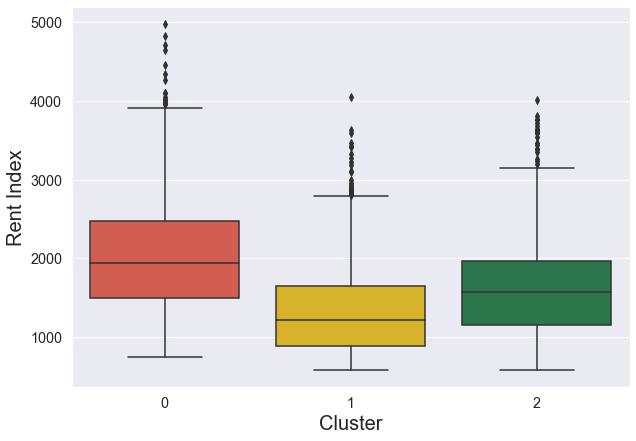

In [123]:
sns.set(font_scale = 1.3)
plt.figure(figsize=(10,7))
plt.rcParams["axes.labelsize"] = 20
ax = sns.boxplot(x = 'Cluster', y = "future_value",\
                 palette = ['#E74C3C', '#F1C40F', '#1E8449'], data = cluster_info)
ax.set(ylabel='Rent Index', xlabel='Cluster')